<a href="https://colab.research.google.com/github/xpessoles/Informatique_Dev/blob/master/Classification_Supervise%CC%81e_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Supervisée - Random Forest

David Filliat

Sources : 
- https://www.dataschool.io/
- http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

## Base de données iris

Une base des données sur les feuilles d'Iris et l'espèce correspondante

![Iris](https://i0.wp.com/blog.kaggle.com/wp-content/uploads/2015/04/iris_petal_sepal.png)

Un dataset 'jouet' avec lequel il est facile de travailler et de faire de la classification supervisée :

- 50 échantilons de 3 espèces différentes d'iris (150 échantillons au total)
- Mesures: longueur sepal, largeur sepal, longueur petale, largeur petale

## Chargement du dataset avec scikit-learn

In [ ]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# load the iris data
iris = load_iris()

## Visualisation et préparation des données

- Le champ 'data' contient les caractéristiques sous forme de matrice. Chaque ligne correspond à un exemple. 
- Chaque colonne de 'data' correspond à une caractéristique dont le nom est donné dans le champ 'feature_names'

In [ ]:
# print the iris data
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


- Le champ 'target' contient les valeurs à prédire, ici un numéro correspondant à l'espèce de chaque exemple.
- Le champ 'target_names' contient le nom de l'espèce associée

In [ ]:
# print integers representing the species of each observation
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Pour plus de clarté, nous appelons X les caractéristiques et y les valeurs à prédire, qui contiennent chacun 150 lignes.

In [ ]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


Nous allons maintenant séparer l'ensemble de ces données en données d'apprentissage et de test, en prenant 50% des données pour l'apprentissage et le reste pour le test.

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

# print the shapes of the new X objects
print("Train data size : ", X_train.shape)
print("Test data size : ", X_test.shape)

Train data size :  (75, 4)
Test data size :  (75, 4)


## Entrainement d'une Foret Aléatoire

Nous allons maintenant entrainer une forêt aléatoire sur l'ensemble d'apprentissage, et tester les résultats sur l'ensemble de test. L'apprentissage ayant une composante stochastique, vous pourrez voir que les résultats peuvent être légèrement différents à chaque exécution.

In [ ]:
# import and create the model 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)

# Test learned model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Accuracy on train set :",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy on test set :",metrics.accuracy_score(y_test, y_test_pred))


Accuracy on train set : 1.0
Accuracy on test set : 0.9466666666666667


Vous pouvez voir que l'entrainement atteint un score quasiment parfait sur l'ensemble d'entrainement, et généralise assez bien avec une performance proche sur l'ensemble de test.

## Visualisation des résultats

Nous allons maintenant définir des fonctions d'affichange pour visualiser la matrice de confusion.

In [ ]:
# Import plotting functions
%matplotlib inline
from __future__ import print_function, division
import itertools
import numpy as np
import matplotlib.pyplot as plt

# Colors from Colorbrewer Paired_12
colors = [[31, 120, 180], [51, 160, 44]]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

# functions to show an image
def imshow(img):
    """
    :param img: (PyTorch Tensor)
    """
    # unnormalize
    img = img / 2 + 0.5     
    # Convert tensor to numpy array
    npimg = img.numpy()
    # Color channel first -> color channel last
    plt.imshow(np.transpose(npimg, (1, 2, 0)))



def plot_losses(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training loss", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation loss", linewidth=2)
    plt.axes().set_xlabel('Epoch')
    plt.axes().set_ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    :param cm: (numpy matrix) confusion matrix
    :param classes: [str]
    :param normalize: (bool)
    :param title: (str)
    :param cmap: (matplotlib color map)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 8))   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


A l'aide de ces fonctions, nous allons maintenant visualise les performances de notre arbre :

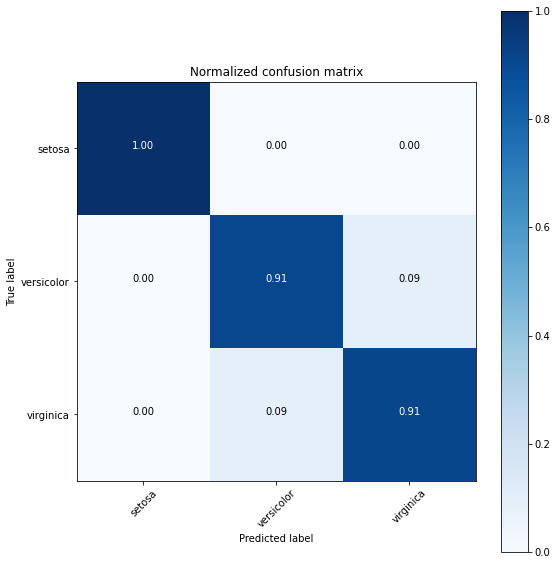

In [ ]:

# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

# Plot normalized confusion matrix
plot_confusion_matrix(confusion_matrix, iris.target_names, normalize=True,
                      title='Normalized confusion matrix')

## Visualisation d'un des arbres de décision appris

Nous pouvons également visualiser graphiquement un des arbres de décision appris au sein de la forêt. Vous pouvez voir dans chaque noeud le nombre d'exemples de chaque classe correspondant et la caractéristique choisie pour séparer ces exemples dans les deux fils. 

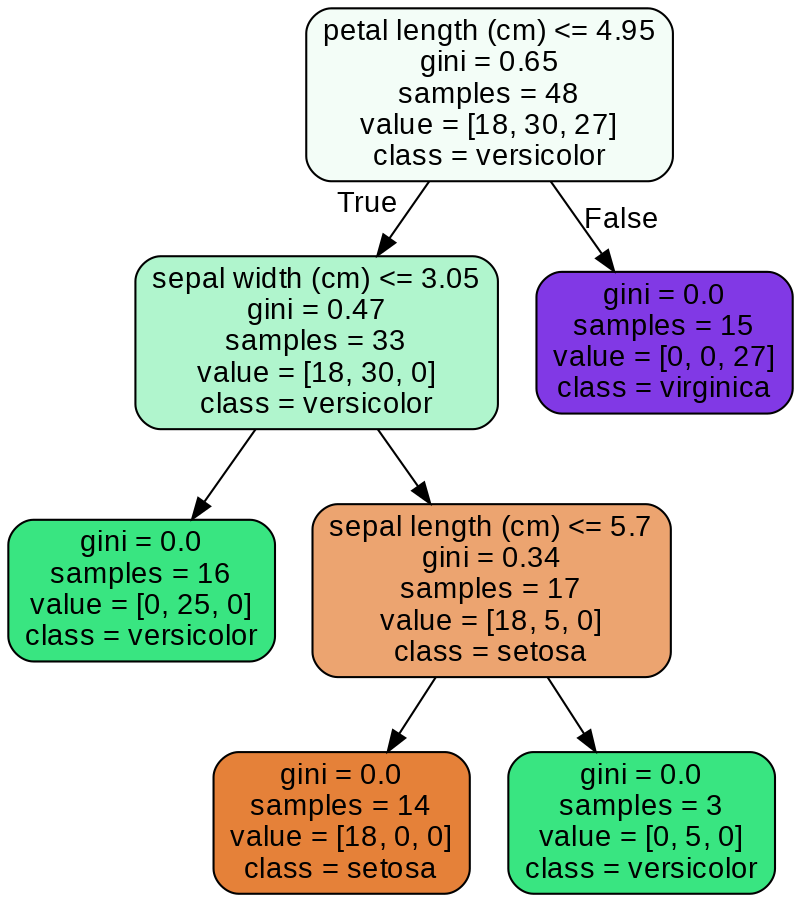

In [ ]:
# Extract single tree
estimator = model.estimators_[0]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=150'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## Optimisation des paramètres du modèle

Vous pouvez maintenant modifier les paramètres de l'algorithme de Forêt Aléatoire pour étudier leurs effets. Nous partons d'un modèle très limité (un arbre avec une seule feuille pour montrer un cas typique de sous-apprentissage ou le modèle est mauvais sur l'ensemble d'entrainement). En particulier, vous pouvez faire varier :
- Le nombre d'arbres : paramètre n_estimators
- La profondeur maximal des arbres : paramètre max_depth

D'autres paramètres existent et sont donnés dans la documentation : [Random Forest Doc](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Le dataset étant simple, vous devriez voir que les paramètres ont peu d'effet à partir d'une certaine valeur.

In [ ]:
model = RandomForestClassifier(n_estimators=1,max_depth=1)

# Train
model.fit(X_train, y_train)

# Test learned model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print("Accuracy on train set :",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy on test set :",metrics.accuracy_score(y_test, y_test_pred))


Accuracy on train set : 0.64
Accuracy on test set : 0.6933333333333334


## Application à la reconnaissance de chiffres

Nous allons maintenant appliquer les forets aléatoires à un dataset un peu plus complexe pour la reconnaissance de chiffres.

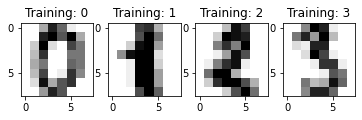

In [ ]:
# import load_digits function from datasets module
from sklearn.datasets import load_digits
digits = load_digits()

# affichage des données
import matplotlib.pyplot as plt

for index in range(4):
    plt.subplot(1, 4, index + 1)
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % digits.target[index])

Les données de ce dataset sont des images, représentées par des matrices en 2 dimensions. Le dataset complet est donc un tenseur en 3 dimensions. Pour appliquer les forêts aléatoires, nous devons d'abord le convertir en une matrice 2 dimensions ou chaque image est une ligne.

In [ ]:
#convert dataset in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Nous allons maintenant pouvoir créer les ensembles d'entrainement et de test, puis définir et entrainer une forêt aléatoire. Modifiez les différents paramètres (taille de l'ensemble d'entrainement, paramètres de la Forêt aléatoire...) pour obtenir des bonnes performances.

Train data size :  (53, 64)
Test data size :  (1744, 64)
Accuracy on train set : 0.5094339622641509
Accuracy on test set : 0.2775229357798165


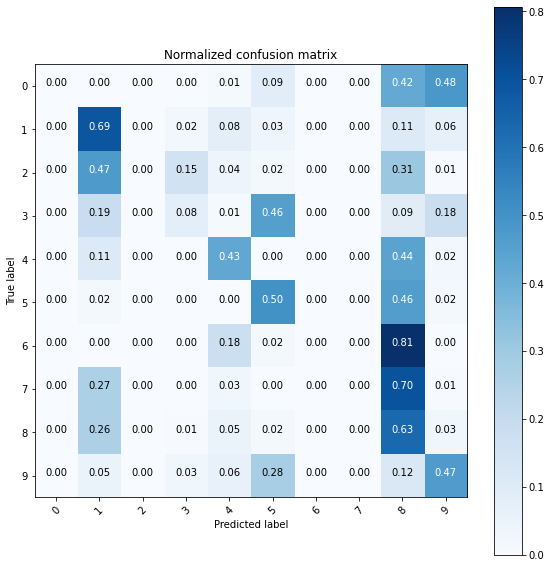

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.97, random_state=4)
# print the shapes of the new X objects
print("Train data size : ", X_train.shape)
print("Test data size : ", X_test.shape)

# Define model to train
model = RandomForestClassifier(n_estimators=2,max_depth=2)

# Train
model.fit(X_train, y_train)

# Test learned model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Accuracy on train set :",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy on test set :",metrics.accuracy_score(y_test, y_test_pred))

# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

# Plot normalized confusion matrix
plot_confusion_matrix(confusion_matrix, [str(x) for x in range(10)], normalize=True,
                      title='Normalized confusion matrix')

Visualisation du premier arbre de la forêt :

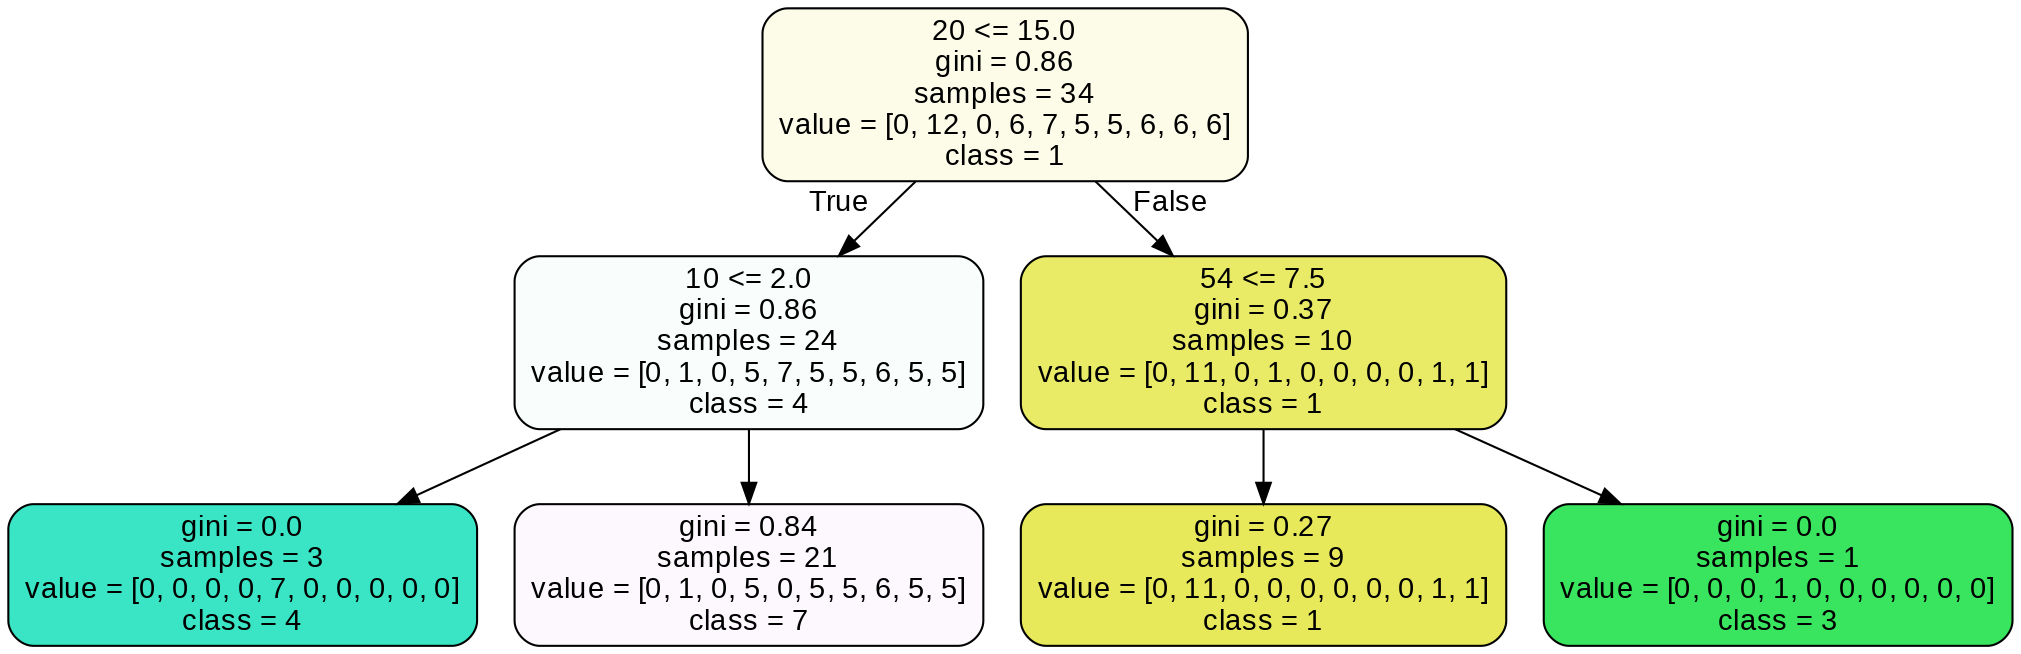

In [ ]:
# Extract single tree
estimator = model.estimators_[0]

from sklearn.tree import export_graphviz
# Export as dot file

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = [str(x) for x in range(64)],
                class_names = [str(x) for x in range(10)],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=150'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## Autres méthodes de classification

Pour terminer, en vous inspirant des codes précédents, vous pouvez tester d'autres modèles de classification (par exemples SVM) sur les données que vous souhaitez. La liste des modèles disponibles est ici : http://scikit-learn.org/stable/user_guide.html